<a href="https://colab.research.google.com/github/Minh-A/Data_Analysis/blob/main/Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# 구글드라이브 연결
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import pandas as pd
import numpy as np
import os
import glob
import random

import warnings
warnings.filterwarnings("ignore")

In [4]:
train = glob.glob('/content/drive/MyDrive/Colab Notebooks/Auto_Analisys/file/*.csv')
len(train)

6

In [5]:
train

['/content/drive/MyDrive/Colab Notebooks/Auto_Analisys/file/Analysis2.csv',
 '/content/drive/MyDrive/Colab Notebooks/Auto_Analisys/file/Analysis3.csv',
 '/content/drive/MyDrive/Colab Notebooks/Auto_Analisys/file/Analysis4.csv',
 '/content/drive/MyDrive/Colab Notebooks/Auto_Analisys/file/Analysis5.csv',
 '/content/drive/MyDrive/Colab Notebooks/Auto_Analisys/file/Analysis6.csv',
 '/content/drive/MyDrive/Colab Notebooks/Auto_Analisys/file/Analysis.csv']

In [6]:
temp = pd.read_csv(train[0], encoding='cp949', index_col= 'Unnamed: 0')
temp

,코드,코드명,현재가,거래량,거래대금,날짜,시가,고가,저가
0,002680,한탑,2650,1472052,3988,20201230,2515,2925,2450
1,002680,한탑,2500,328018,844,20201229,2640,2680,2485
2,002680,한탑,2675,506930,1310,20201228,2595,2700,2490
3,002680,한탑,2625,267663,697,20201224,2615,2665,2530
4,002680,한탑,2630,387148,1015,20201223,2750,2775,2535
...,...,...,...,...,...,...,...,...,...
39195,000720,현대건설,32950,2108776,69084,20201110,32400,33250,32050
39196,000720,현대건설,31750,739098,23298,20201109,31250,31800,31100
39197,000720,현대건설,31050,554258,17263,20201106,31300,31550,30950
39198,000720,현대건설,31300,828936,25870,20201105,31350,31550,30850


In [7]:
a = temp.iloc[0:40,:]  # :은 작다를 의미, 작거나 같다를 의미하는 것은 아님
a.tail()

,코드,코드명,현재가,거래량,거래대금,날짜,시가,고가,저가
35,002680,한탑,2300,282084,647,20201110,2295,2340,2200
36,002680,한탑,2320,140505,323,20201109,2230,2325,2230
37,002680,한탑,2250,108889,242,20201106,2250,2250,2190
38,002680,한탑,2260,279565,627,20201105,2285,2350,2140
39,002680,한탑,2285,1175997,2666,20201104,2100,2390,2085


In [56]:
int(len(temp)/40)

980

In [62]:
160 /40

4.0

In [8]:
for i in range(4):
  if i == 0:
    f = i
  else:
    f = i + (39*i)
  j = f + 40
  print(f,j)

0 40
40 80
80 120
120 160


In [ ]:
0 40
41 81
82 122

In [9]:
# 변수 지정
for i in range(int(len(temp)/40)):
  if i == 0:
    f = i
  else:
    f = i + (39*i)
  n = f + 40
  globals()['t_{}'.format(i+1)] = temp.iloc[f:n,:].reset_index(drop = True)
print(f,n)

39160 39200


In [57]:
39200 /40

980.0

In [10]:
t_980.tail()

,코드,코드명,현재가,거래량,거래대금,날짜,시가,고가,저가
35,000720,현대건설,32950,2108776,69084,20201110,32400,33250,32050
36,000720,현대건설,31750,739098,23298,20201109,31250,31800,31100
37,000720,현대건설,31050,554258,17263,20201106,31300,31550,30950
38,000720,현대건설,31300,828936,25870,20201105,31350,31550,30850
39,000720,현대건설,31550,853254,26794,20201104,31400,31850,31000


In [51]:
a = t_1.loc[:,['현재가','거래량','시가']]
a = a.to_numpy()

In [52]:
a[:,0]

array([2650, 2500, 2675, 2625, 2630, 2725, 2705, 2845, 2860, 2825, 2940,
       3020, 3280, 3450, 3210, 3240, 3205, 2980, 3335, 3485, 3535, 3545,
       3350, 3100, 3130, 2915, 3000, 2600, 2450, 2295, 2265, 2155, 2055,
       2090, 2100, 2300, 2320, 2250, 2260, 2285])

> 첫 번째는 40일간의 데이터를 가지고, 종목을 뽑아보기

> 거래량과 시가, 고가, 저가

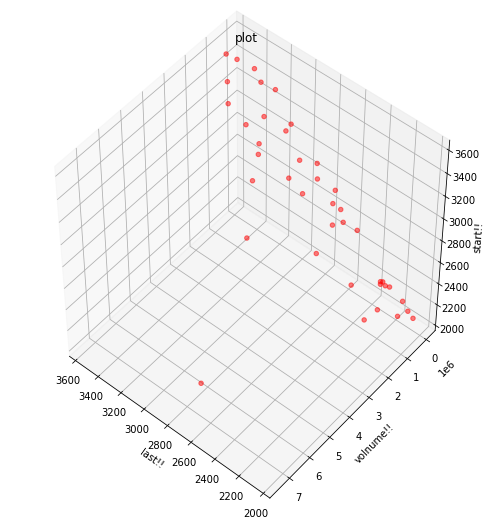

In [65]:
#군집 시각화 (3차원)
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(7, 7))
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=130)
ax.scatter(a[:,0], a[:,1], a[:,2], c= 'r', alpha=0.5, cmap='rainbow')
ax.set_title('plot')
ax.set_xlabel('last!!')
ax.set_ylabel('volnume!!')
ax.set_zlabel('start!!')
plt.show()

In [77]:
# K-Means 모델
from sklearn.cluster import KMeans
import matplotlib.pyplot  as plt

k = 3
# create model and prediction
model = KMeans(n_clusters=k,algorithm='auto')
model.fit(a)
predict = pd.DataFrame(model.predict(a))
predict.columns=['predict']

In [83]:
# vstack은 행으로 붙이기, hstack는 열로 붙이기
final_df = pd.DataFrame(np.hstack((predict, a)))

In [133]:
final_df.head()

,0,1,2,3
0,2,2650,1472052,2515
1,0,2500,328018,2640
2,0,2675,506930,2595
3,0,2625,267663,2615
4,0,2630,387148,2750


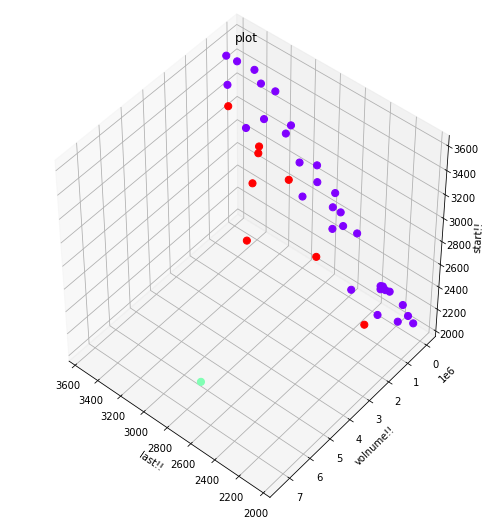

In [130]:
#군집 시각화 (3차원)
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(7, 7))
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=45, azim=130)
ax.scatter(final_df[1], final_df[2], final_df[3], c= final_df[0], alpha=1, s = 50,cmap='rainbow')
ax.set_title('plot')
ax.set_xlabel('last!!')
ax.set_ylabel('volnume!!')
ax.set_zlabel('start!!')
plt.show()

In [269]:
# K-Means 함수

def kmeans(data): 
  # 라이브러리
  from sklearn.cluster import KMeans
  import matplotlib.pyplot  as plt
  from mpl_toolkits.mplot3d import Axes3D

  data =data.loc[:,['현재가','거래량','시가']]
  data = data.to_numpy()

  k = 3
  model = KMeans(n_clusters=k,algorithm='auto')
  model.fit(data)
  predict = pd.DataFrame(model.predict(data))
  predict.columns=['predict']

  global name
  name = pd.DataFrame(np.hstack((predict, data)))

  fig = plt.figure(figsize=(20, 20))
  ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=45, azim=130)
  ax.scatter(name[1], name[2], name[3], c= name[0], alpha=1, s=50, cmap='rainbow') 
  ax.set_title('plot')
  ax.set_xlabel('last!!')
  ax.set_ylabel('volnume!!')
  ax.set_zlabel('start!!')
  plt.show()

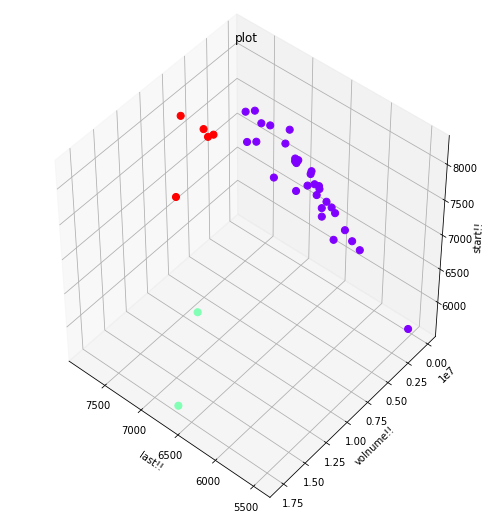

In [173]:
kmeans(t_5)

전체를 정규화를 해서 모델링과 그래프화

In [262]:
# 변수 지정
data = pd.DataFrame()


In [263]:
data

""


In [266]:
# 변수 지정
data = pd.DataFrame()

for i in range(int(len(temp)/40)):
  if i == 0:
    f = i
  else:
    f = i + (39*i)
  n = f + 40
  data1 = temp.iloc[f:n,:]
  data1 = data1.loc[:,['현재가','거래량','시가']]

  # 정규화
  transformer = MinMaxScaler()
  transformer.fit(data1)
  data1 = transformer.transform(data1)
  data1 = pd.DataFrame(data1, columns = ['현재가', '거래량', '시가'])

  data = pd.concat([data, data1], axis = 0).reset_index(drop = True)


In [267]:
data

,현재가,거래량,시가
0,0.399329,0.192124,0.300330
1,0.298658,0.036665,0.382838
2,0.416107,0.060977,0.353135
3,0.382550,0.028464,0.366337
4,0.385906,0.044700,0.455446
...,...,...,...
39195,0.242038,0.446683,0.145570
39196,0.089172,0.053113,0.000000
39197,0.000000,0.000000,0.006329
39198,0.031847,0.078927,0.012658


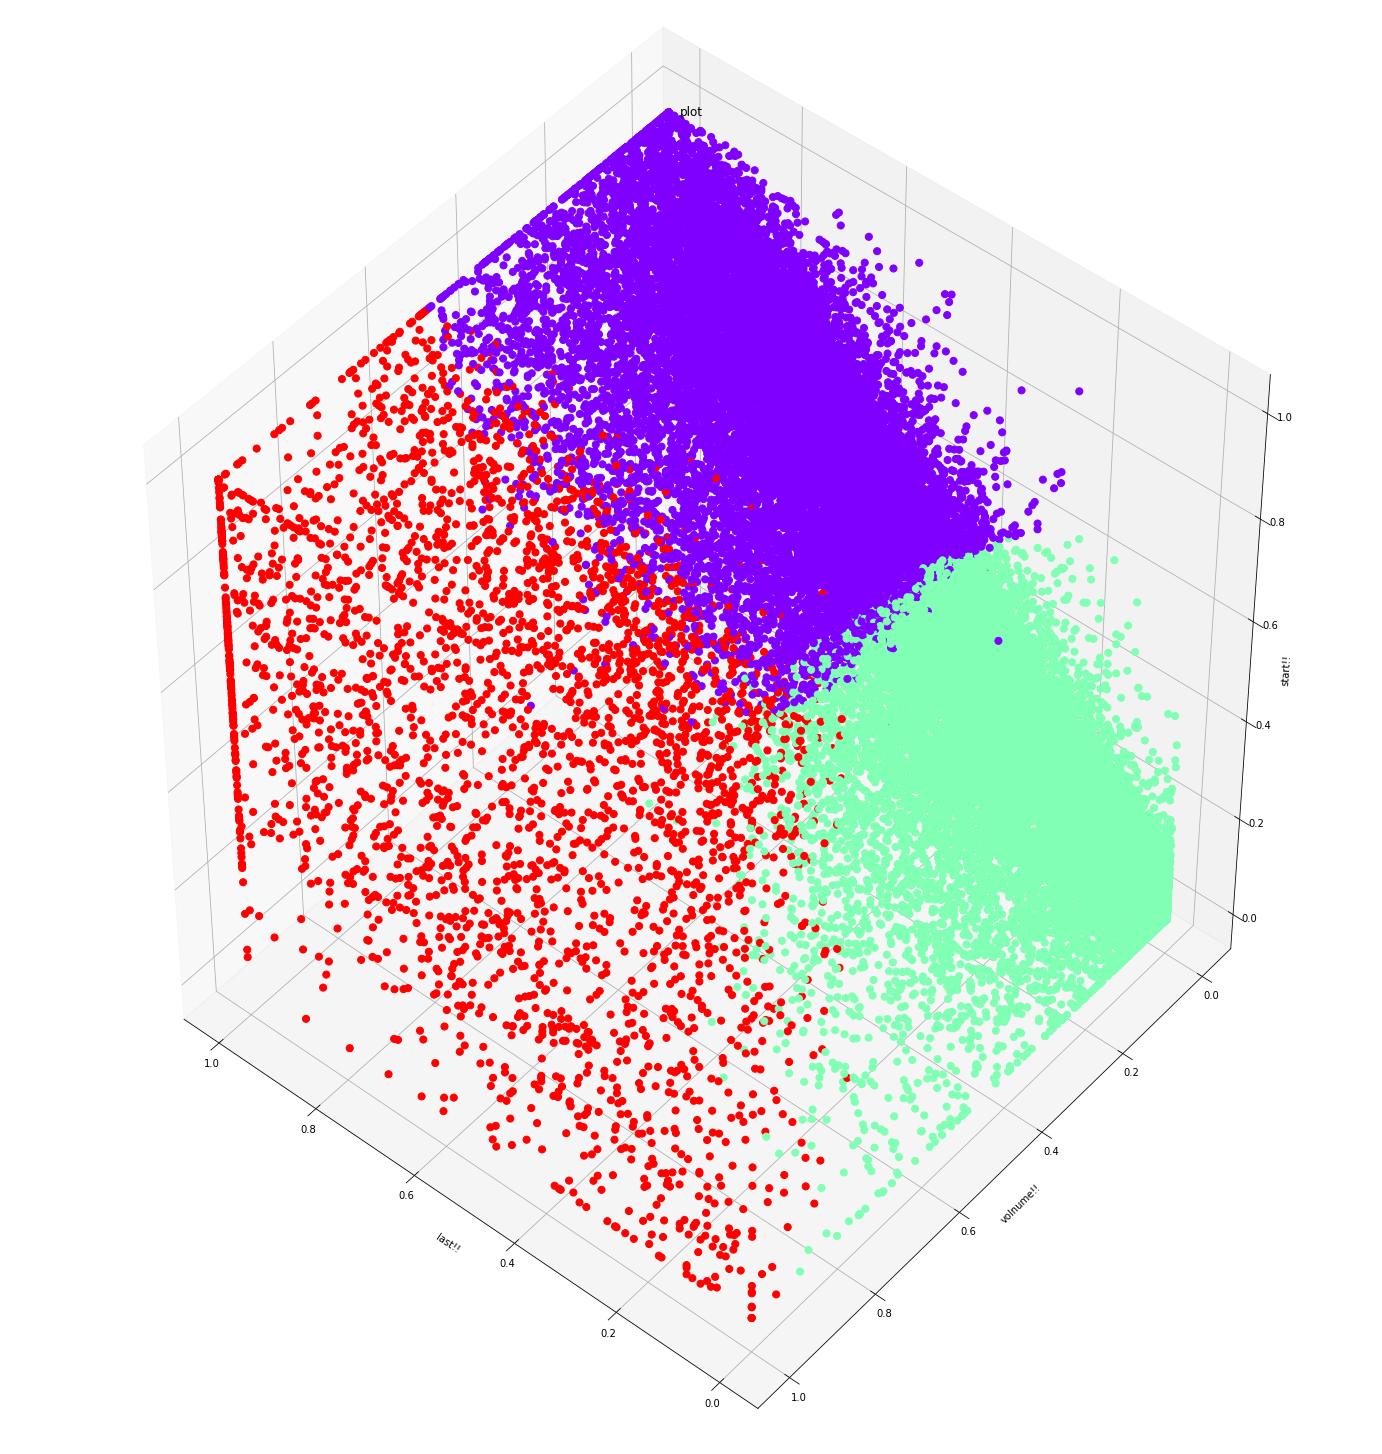

In [270]:
kmeans(data)

In [207]:
whole = temp.loc[:,['현재가','거래량','시가']]
whole

,현재가,거래량,시가
0,2650,1472052,2515
1,2500,328018,2640
2,2675,506930,2595
3,2625,267663,2615
4,2630,387148,2750
...,...,...,...
39195,32950,2108776,32400
39196,31750,739098,31250
39197,31050,554258,31300
39198,31300,828936,31350


In [196]:
whole.columns

Index(['현재가', '거래량', '시가'], dtype='object')

In [208]:
from sklearn.preprocessing import MinMaxScaler

# 정규화
transformer = MinMaxScaler()
transformer.fit(whole)
whole = transformer.transform(whole)
whole = pd.DataFrame(whole, columns = ['현재가', '거래량', '시가'])

In [209]:
whole

,현재가,거래량,시가
0,0.001509,0.002988,0.001431
1,0.001418,0.000666,0.001507
2,0.001524,0.001029,0.001479
3,0.001494,0.000543,0.001491
4,0.001497,0.000786,0.001573
...,...,...,...
39195,0.019886,0.004280,0.019599
39196,0.019158,0.001500,0.018900
39197,0.018733,0.001125,0.018931
39198,0.018885,0.001682,0.018961


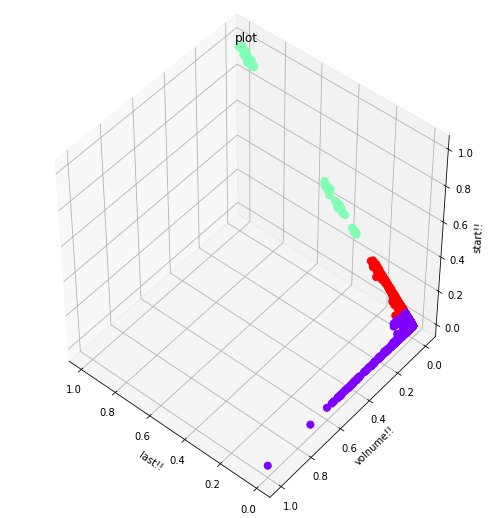

In [210]:
kmeans(whole)

In [71]:
from sklearn.cluster import KMeans

#클러스터의 개수 지정(n개)
num_clusters = 2

#알맞은 매트릭스 Z 삽입
km = KMeans(n_clusters=num_clusters)
km.fit(a)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [70]:
from scipy.spatial.distance import cdist
distortions = []

K = range(0,40)
for k in K:
    kmeanModel = KMeans(n_clusters=k).fit(a)
    kmeanModel.fit(a)
    distortions.append(sum(np.min(cdist(a, kmeanModel.cluster_centers_, 'euclidean'), axis=1)) / a.shape[0])
  
# Plot the elbow
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

OverflowError: ignored


https://dacon.io/competitions/official/235663/codeshare/2159?page=1&dtype=recent&ptype=pub


In [ ]:
Z = clus_data
distortions = []
K = range(1,10)
for k in K:
    kmeanModel = KMeans(n_clusters=k).fit(Z)
    kmeanModel.fit(Z)
    distortions.append(sum(np.min(cdist(Z, kmeanModel.cluster_centers_, 'euclidean'), axis=1)) / Z.shape[0])
# Plot the elbow
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

In [ ]:
model = KMeans(n_clusters=4,algorithm='auto')
model.fit(clus_data)

predict = pd.DataFrame(model.predict(clus_data))
center = model.cluster_centers_
labels = model.labels_
predict.columns=['predict']

# 결과 합치기
final_df = pd.DataFrame(np.hstack((predict, clus_data)))
# 컬럼명 지정
cols = list(clus_data.columns.values)
cols.insert(0,'group')
final_df.columns = cols

# 그룹이름 변경
group_name = {0: 'gr01',
               1: 'gr02',
               2: 'gr03',
              3: 'gr04'}

final_df['group'] = final_df['group'].replace(group_name)
new_cus['group'] = final_df['group']

In [ ]:
# 2개의 차원으로 축소
transformed = PCA(n_components=2).fit_transform(clus_data)

pca_df = pd.DataFrame(data=transformed, columns=['제1주성분','제2주성분']) 
plt.figure(figsize=(20,10))
plt.scatter('제1주성분','제2주성분',data=pca_df,c=labels,cmap='rainbow')
plt.xlabel('제1주성분')
plt.ylabel('제2주성분')
plt.show

In [ ]:
#군집 시각화 (3차원)
from mpl_toolkits.mplot3d import Axes3D
dim3 = PCA(n_components=3).fit_transform(clus_data)

fig = plt.figure(figsize=(10, 10))
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=130)
ax.scatter(dim3[:,0], dim3[:,1], dim3[:,2], c=labels, alpha=0.5, cmap='rainbow')
ax.set_title('3차원 산점도 그래프')
ax.set_xlabel('제1 주성분')
ax.set_ylabel('제2 주성분')
ax.set_zlabel('제3 주성분')
plt.show()

In [ ]:
pca = PCA(n_components=4)
pca.fit_transform(clus_data)
print(pca.explained_variance_ratio_)
print(pca.explained_variance_ratio_.cumsum())
# 3차원 주성분으로 65% 설명 가능

In [ ]:
# 그룹 별 개수 시각화
sns.countplot(new_cus['group'], palette="Set2")
new_cus['group'].value_counts()